Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [ ]:
# imports
from __future__ import print_function
import pandas as pd
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11490434/11490434 [==============================] - 3s 0us/step


**Preprocessing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


In [ ]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.4641 - accuracy: 0.8683 - val_loss: 0.2606 - val_accuracy: 0.9264
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2350 - accuracy: 0.9311 - val_loss: 0.1912 - val_accuracy: 0.9442
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1799 - accuracy: 0.9477 - val_loss: 0.1599 - val_accuracy: 0.9539
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1471 - accuracy: 0.9563 - val_loss: 0.1454 - val_accuracy: 0.9564
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1257 - accuracy: 0.9625 - val_loss: 0.1240 - val_accuracy: 0.9632
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1095 - accuracy: 0.9679 - val_loss: 0.1150 - val_accuracy: 0.9641
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0970 - accuracy: 0.9709 - val_loss: 0.1044 - val_accuracy: 0.9682
Epoch 

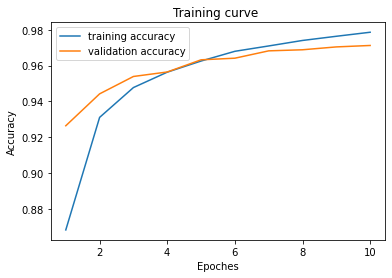

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, fit_info.history['accuracy'], label = "training accuracy")
plt.plot(x, fit_info.history['val_accuracy'],label = "validation accuracy")
plt.title('Training curve ')
plt.legend()
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#2d)
from tensorflow.keras import regularizers

fact=[0.000001, 0.00001, 0.0001, 0.0002, 0.001]
rlts=[]


for i in fact:
    for j in range(3):
        ## Define model ##
        model_2d = Sequential()

        ## Layers ##
        model_2d.add(Flatten())
        model_2d.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(i)))
        model_2d.add(Dense(300, activation = 'relu', kernel_regularizer=regularizers.l2(i)))
        model_2d.add(Dense(num_classes, activation='softmax'))


        model_2d.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)


        fit_info_2d = model_2d.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=40,
            verbose=0, # don't print out all results all of the time
           validation_data=(x_test, y_test))
        score_2d = model_2d.evaluate(x_test, y_test, verbose=0)
        print('Test loss 2d: {}, Test accuracy 2d: {}'.format(score_2d[0], score_2d[1]))
        print(i)
        results.append([score_2d[1], i, j])

C:\Users\Administrator\miniconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Test loss 2d: 0.06622451543807983, Test accuracy 2d: 0.9824000000953674
1e-06
Test loss 2d: 0.06611815840005875, Test accuracy 2d: 0.9822999835014343
1e-06
Test loss 2d: 0.06640991568565369, Test accuracy 2d: 0.9822999835014343
1e-06
Test loss 2d: 0.07723632454872131, Test accuracy 2d: 0.9804999828338623
1e-05
Test loss 2d: 0.07484724372625351, Test accuracy 2d: 0.9825000166893005
1e-05
Test loss 2d: 0.07529304176568985, Test accuracy 2d: 0.9824000000953674
1e-05
Test loss 2d: 0.12031654268503189, Test accuracy 2d: 0.9828000068664551
0.0001
Test loss 2d: 0.11853159219026566, Test accuracy 2d: 0.9817000031471252
0.0001
Test loss 2d: 0.11920168250799179, Test accuracy 2d: 0.9828000068664551
0.0001
Test loss 2d: 0.1332537978887558, Test accuracy 2d: 0.9786999821662903
0.0002
Test loss 2d: 0.12211304903030396, Test accuracy 2d: 0.9830999970436096
0.0002
Test loss 2d: 0.12417630851268768, Test accuracy 2d: 0.9825999736785889
0.0002
Test loss 2d: 0.11803098022937775, Test accuracy 2d: 0.9833

In [ ]:
#This code will take approximately 40-50 min to run. The result has been stored in "scores.csv"

epochs = 40
l2vals = np.linspace(0.000001,0.001,5)
scores = []

#5 different regularization factors to train on
for i in range(5):
        #3 replicates per regularization factor
        for _ in range(3):
                ## Define model ##
                model = Sequential()
                model.add(Flatten())
                model.add(Dense(500, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l2vals[i])))
                model.add(Dense(300, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(l2vals[i])))
                model.add(Dense(num_classes, activation='softmax'))

                model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.SGD(lr = 0.1),
                metrics=['accuracy'],)
                
                fit_info = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))
                scores.append(model.evaluate(x_test, y_test, verbose=0))

print(scores)

Epoch 1/40
469/469 [==============================] - 6s 12ms/step - loss: 0.4123 - accuracy: 0.8882 - val_loss: 0.2527 - val_accuracy: 0.9226
Epoch 2/40
469/469 [==============================] - 6s 12ms/step - loss: 0.1943 - accuracy: 0.9440 - val_loss: 0.1601 - val_accuracy: 0.9524
Epoch 3/40
469/469 [==============================] - 5s 12ms/step - loss: 0.1407 - accuracy: 0.9594 - val_loss: 0.1413 - val_accuracy: 0.9580
Epoch 4/40
469/469 [==============================] - 5s 11ms/step - loss: 0.1105 - accuracy: 0.9680 - val_loss: 0.1057 - val_accuracy: 0.9690
Epoch 5/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0904 - accuracy: 0.9743 - val_loss: 0.0923 - val_accuracy: 0.9721
Epoch 6/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0751 - accuracy: 0.9786 - val_loss: 0.0834 - val_accuracy: 0.9748
Epoch 7/40
469/469 [==============================] - 5s 11ms/step - loss: 0.0636 - accuracy: 0.9819 - val_loss: 0.0834 - val_accuracy: 0.9737

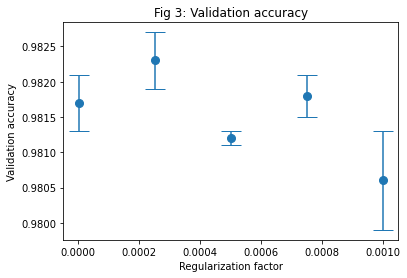

Maximal validation accuracy:  0.982699990272522
Hilton validation accuracy:  0.9847
Difference in validation accuracy from Hilton:  0.002000009727478047


In [ ]:
#Saving the scores for the 15 trainings, since it finished in 40 min. This data will be used below.
pd.DataFrame(scores, columns=["loss", "accuracy"]).to_csv("scores.csv")

#Reading the saved scores-data
df = pd.read_csv("scores.csv")

#Taking out the different sereis in the dataframe
loss = df["loss"]
acc = df["accuracy"]

mean = []
std = []
startIndex = [0, 3, 6, 9, 12]
for i in range (5):
    #start = 3*(i/3)
    start = startIndex[i]
    stop = start + 2
    mean.append(np.mean(acc[start:stop]))
    std.append(np.std(acc[start:stop]))

x_values = np.linspace(0.000001,0.001,5) #Same interval as code block above

plt.scatter(x_values, mean)
plt.xlabel("Regularization factor")
plt.ylabel("Validation accuracy")
plt.title("Fig 3: Validation accuracy")

plt.errorbar(x_values, mean, std, linestyle='None', fmt='o', markersize=8, capsize=10)
plt.show()

print("Maximal validation accuracy: ", np.max(acc))
print("Hilton validation accuracy: ", 0.9847)
print("Difference in validation accuracy from Hilton: ", 0.9847-np.max(acc))

### Question 3

In [ ]:
## Define model ##
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(28, 28, 1))) # creates convolution filters
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # to downsize input
model.add(Conv2D(64, (5, 5), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # to decrease dimension
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=256,
           epochs=10,
           verbose=1,
           validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

model.save('q3model')

Epoch 1/10
235/235 [==============================] - 31s 130ms/step - loss: 0.2699 - accuracy: 0.9244 - val_loss: 0.0831 - val_accuracy: 0.9721
Epoch 2/10
235/235 [==============================] - 30s 127ms/step - loss: 0.0644 - accuracy: 0.9809 - val_loss: 0.0536 - val_accuracy: 0.9832
Epoch 3/10
235/235 [==============================] - 30s 127ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0314 - val_accuracy: 0.9907
Epoch 4/10
235/235 [==============================] - 30s 126ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0382 - val_accuracy: 0.9884
Epoch 5/10
235/235 [==============================] - 30s 129ms/step - loss: 0.0268 - accuracy: 0.9919 - val_loss: 0.0263 - val_accuracy: 0.9914
Epoch 6/10
235/235 [==============================] - 30s 127ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0282 - val_accuracy: 0.9908
Epoch 7/10
235/235 [==============================] - 31s 134ms/step - loss: 0.0193 - accuracy: 0.9940 - val_loss: 0.0249 - val_ac

INFO:tensorflow:Assets written to: q3model\assets


INFO:tensorflow:Assets written to: q3model\assets


### Question 4) Auto-Encoder for denoising


In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [ ]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 6s 5ms/step - loss: 0.1888 - val_loss: 0.1507
Epoch 2/32
938/938 [==============================] - 4s 5ms/step - loss: 0.1451 - val_loss: 0.1383
Epoch 3/32
938/938 [==============================] - 5s 6ms/step - loss: 0.1358 - val_loss: 0.1335
Epoch 4/32
938/938 [==============================] - 4s 5ms/step - loss: 0.1308 - val_loss: 0.1288
Epoch 5/32
938/938 [==============================] - 4s 4ms/step - loss: 0.1276 - val_loss: 0.1272
Epoch 6/32
938/938 [==============================] - 4s 4ms/step - loss: 0.1254 - val_loss: 0.1254
Epoch 7/32
938/938 [==============================] - 4s 5ms/step - loss: 0.1239 - val_loss: 0.1245
Epoch 8/32
938/938 [==============================] - 4s 5ms/step - loss: 0.1225 - val_loss: 0.1233
Epoch 9/32
938/938 [==============================] - 6s 6ms/step - loss: 0.1216 - val_loss: 0.1223
Epoch 10/32
938/938 [==============================] - 4s 5ms/step - loss: 0.1207 - val_loss: 0.1225

313/313 [==============================] - 1s 3ms/step
Noise: 0


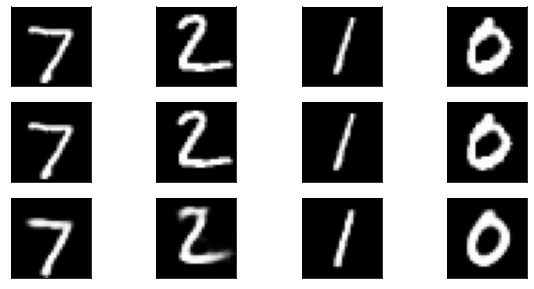

313/313 [==============================] - 1s 3ms/step
Noise: 0.2


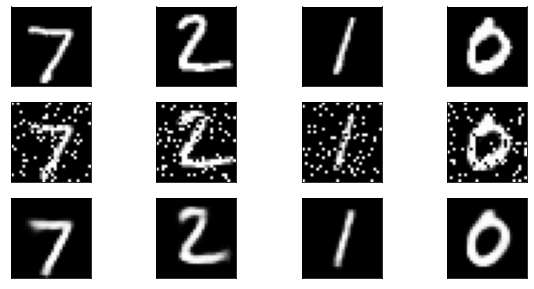

313/313 [==============================] - 1s 3ms/step
Noise: 0.4


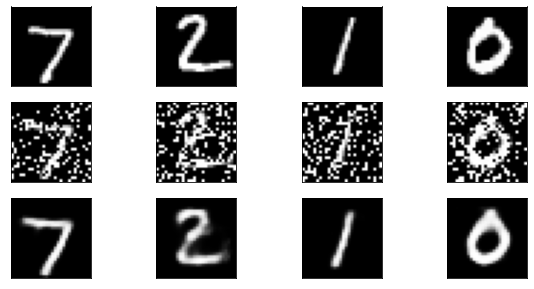

313/313 [==============================] - 1s 3ms/step
Noise: 0.6


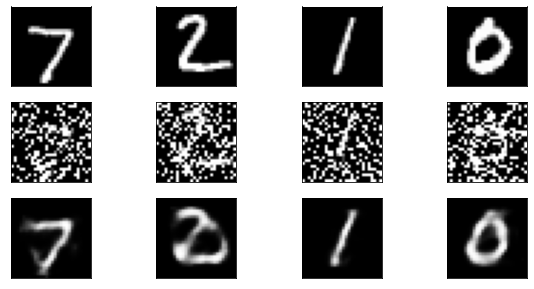

313/313 [==============================] - 1s 3ms/step
Noise: 0.8


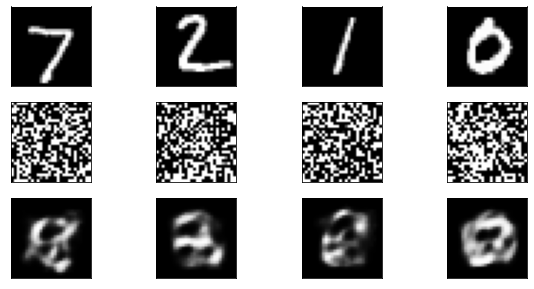

313/313 [==============================] - 1s 3ms/step
Noise: 1


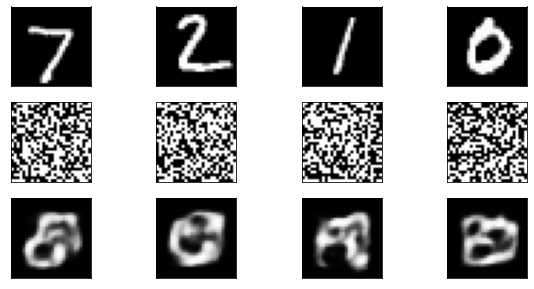

In [ ]:
#4b)
import random
noise = [0, 0.2, 0.4, 0.6, 0.8, 1]

for j in range (6):
    #Creating noise on the images
    flattened_season = salt_and_pepper(flattened_x_test, noise[j])

    #Decoding the noised images
    deco_image = autoencoder.predict(flattened_seasoned)

    n = 4  # How many digits we will display
    plt.figure(figsize=(10, 5))
    print("Noise: " + str(noise[j]))

    pic_index = random.sample(range(1, len(flattened_season)), n)
    for i in range(n):
        index = pic_index[i]
        # Display original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display seasoned
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(flattened_season[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display denoised
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(deco_image[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


In [ ]:
#Load the best model from Q3
model_loaded = keras.models.load_model("q3model", compile = True)

#noises = [0, 0.2, 0.4, 0.6, 0.8, 1]
noises = np.linspace(0,1,15)

deno_score = []
season_score = []
for j in range (len(noises)):
    print("Iteration:", j)

    #Creating noise on the images
    flattened_season = salt_and_pepper(flattened_x_test, noises[j])

    #Decoding the noised images
    deco_image = autoencoder.predict(flattened_season)

    #Reshaping the decoded images and the test images to fit the loaded model
    deco_imgage_re = deco_image.reshape(len(deco_image), 28, 28, 1)
    x_test_season = flattened_season.reshape(len(flattened_season), 28, 28, 1)

    deno_score.append(model_loaded.evaluate(deco_image_re, y_test, verbose=0)[1])
    season_score.append(model_loaded.evaluate(x_test_season, y_test, verbose=0)[1])

Iteration: 0
313/313 [==============================] - 1s 3ms/step
Iteration: 1
313/313 [==============================] - 1s 2ms/step
Iteration: 2
313/313 [==============================] - 1s 3ms/step
Iteration: 3
313/313 [==============================] - 1s 3ms/step
Iteration: 4
313/313 [==============================] - 1s 3ms/step
Iteration: 5
313/313 [==============================] - 1s 3ms/step
Iteration: 6
313/313 [==============================] - 1s 2ms/step
Iteration: 7
313/313 [==============================] - 1s 3ms/step
Iteration: 8
313/313 [==============================] - 1s 2ms/step
Iteration: 9
313/313 [==============================] - 1s 2ms/step
Iteration: 10
313/313 [==============================] - 1s 2ms/step
Iteration: 11
313/313 [==============================] - 1s 2ms/step
Iteration: 12
313/313 [==============================] - 1s 2ms/step
Iteration: 13
313/313 [==============================] - 1s 2ms/step
Iteration: 14
313/313 [=====================

[0.9527999758720398, 0.9514999985694885, 0.9513000249862671, 0.9466999769210815, 0.9440000057220459, 0.9248999953269958, 0.9004999995231628, 0.8555999994277954, 0.7631999850273132, 0.6255000233650208, 0.4797999858856201, 0.33709999918937683, 0.22010000050067902, 0.1436000019311905, 0.09709999710321426]
[0.9926999807357788, 0.9864000082015991, 0.9703999757766724, 0.9394999742507935, 0.8669999837875366, 0.7709000110626221, 0.6442999839782715, 0.507099986076355, 0.3765000104904175, 0.27950000762939453, 0.19840000569820404, 0.15139999985694885, 0.12030000239610672, 0.10790000110864639, 0.09629999846220016]


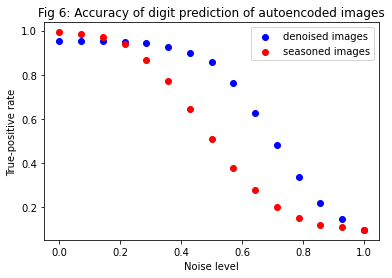

In [ ]:
print(deno_score)
print(season_score)
plt.scatter(noises, scores_denoised, color='blue', label = 'denoised images')
plt.scatter(noises, scores_seasoned, color='red', label = 'seasoned images')
plt.xlabel("Noise level")
plt.ylabel("True-positive rate")
plt.title("Fig 6: Accuracy of digit prediction of autoencoded images")
plt.legend()
plt.show()